In [2]:
!pip install yfinance

In [3]:
import yfinance as yf

In [12]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20,end.month,end.day)

In [13]:
stock = "GOOG"
google_data = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [14]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-09-15,2.753679,2.845086,2.744712,2.789544,2.782710,215279909
2004-09-16,2.798012,2.884189,2.780827,2.838610,2.831656,186207345
2004-09-17,2.849818,2.926282,2.828149,2.926282,2.919113,190350817
2004-09-20,2.912832,3.028648,2.908349,2.972857,2.965574,213585582
2004-09-21,2.984065,2.999258,2.926780,2.934999,2.927809,145262446


In [15]:
google_data.shape

(5034, 6)

In [16]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,46.152758,46.640163,45.690510,46.172868,46.062561,1.147305e+08
std,44.205681,44.695425,43.769727,44.235407,44.135025,1.491908e+08
min,2.753679,2.845086,2.744712,2.789544,2.782710,1.584340e+05
25%,13.113472,13.217582,12.956001,13.108927,13.076812,2.708311e+07
50%,27.252178,27.438571,27.001368,27.207801,27.141147,5.399090e+07
75%,61.189000,61.582500,60.499751,60.986875,60.837469,1.407386e+08
max,191.750000,193.309998,190.619995,192.660004,192.406723,1.650833e+09


In [17]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5034 entries, 2004-09-15 to 2024-09-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5034 non-null   float64
 1   High       5034 non-null   float64
 2   Low        5034 non-null   float64
 3   Close      5034 non-null   float64
 4   Adj Close  5034 non-null   float64
 5   Volume     5034 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.3 KB


In [18]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'closing price of Google data')

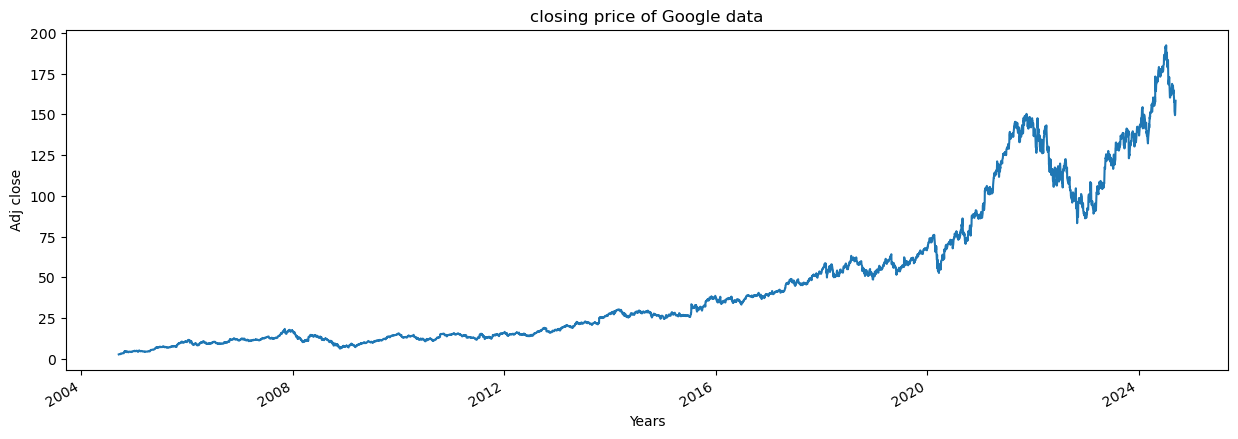

In [25]:
plt.figure(figsize=(15,5))
google_data['Adj Close'].plot()
plt.xlabel("Years")
plt.ylabel("Adj close")
plt.title("closing price of Google data")

In [27]:
def plot_graph(figsize,values,column_name):
    plt.figure(figsize=figsize)
    values.plot()
    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [28]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

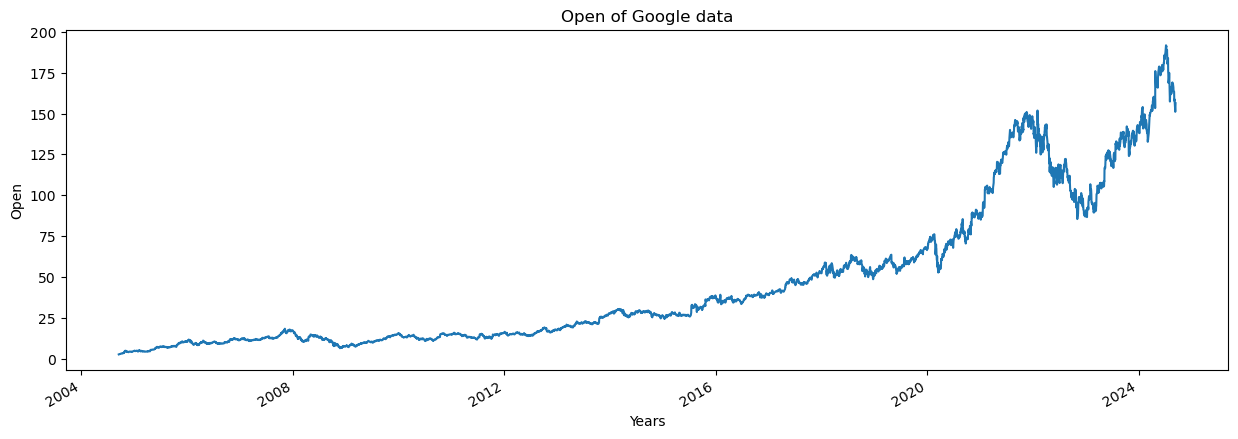

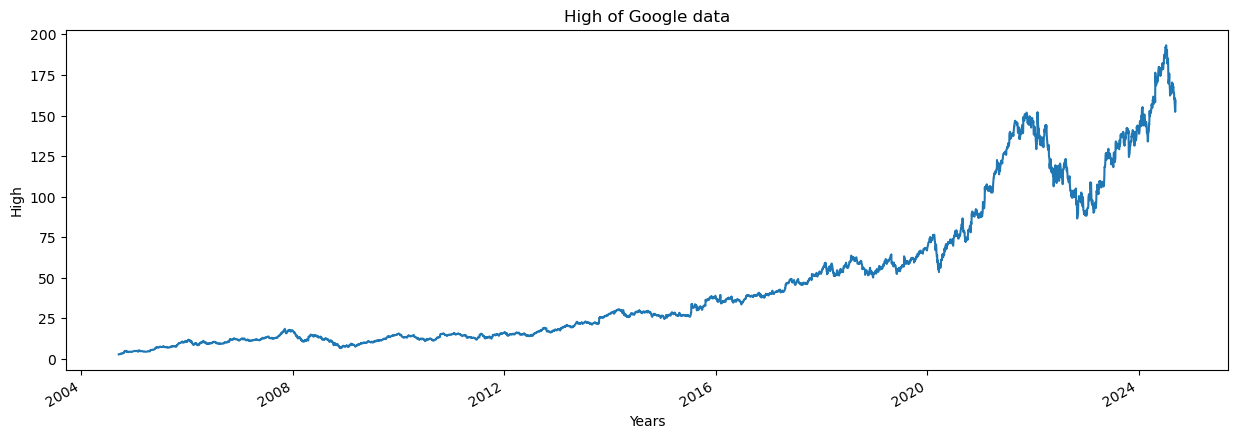

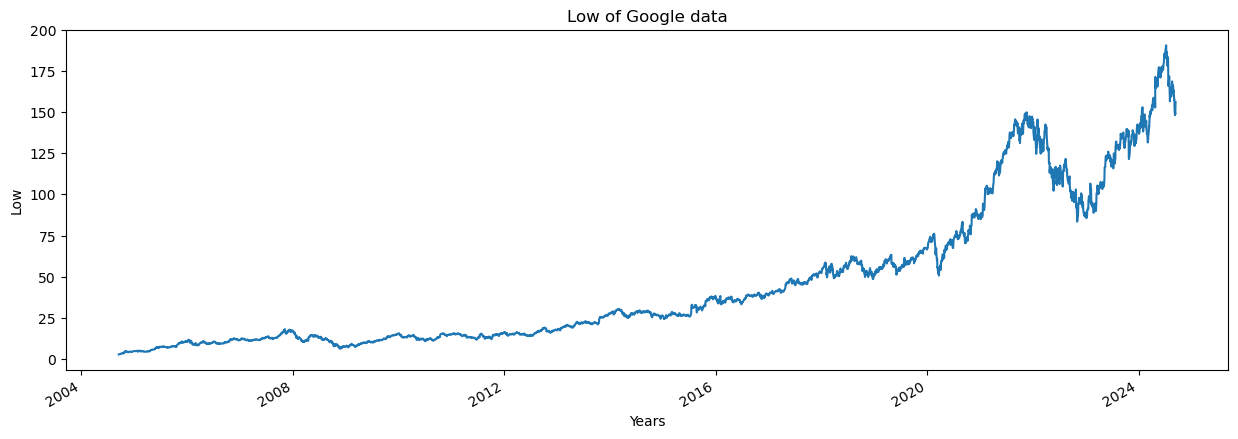

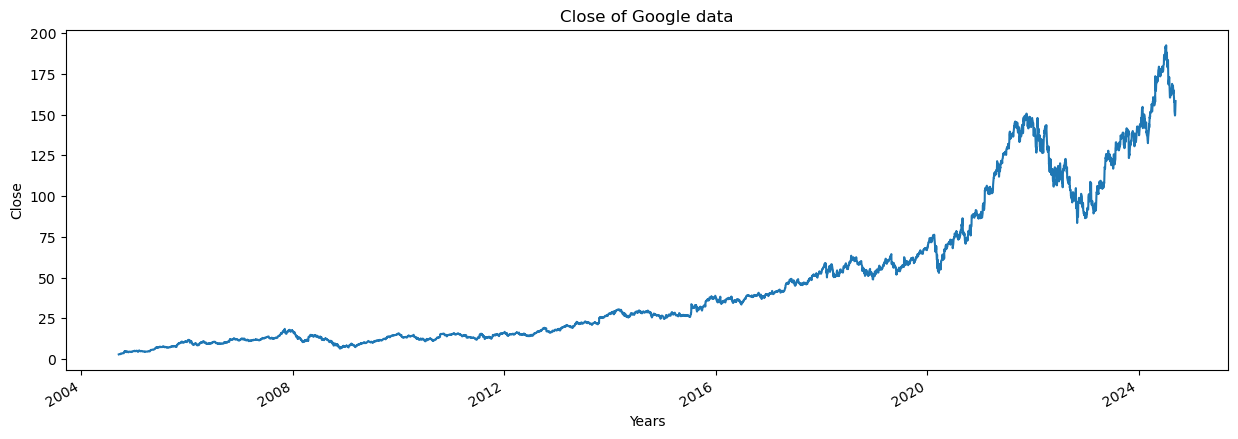

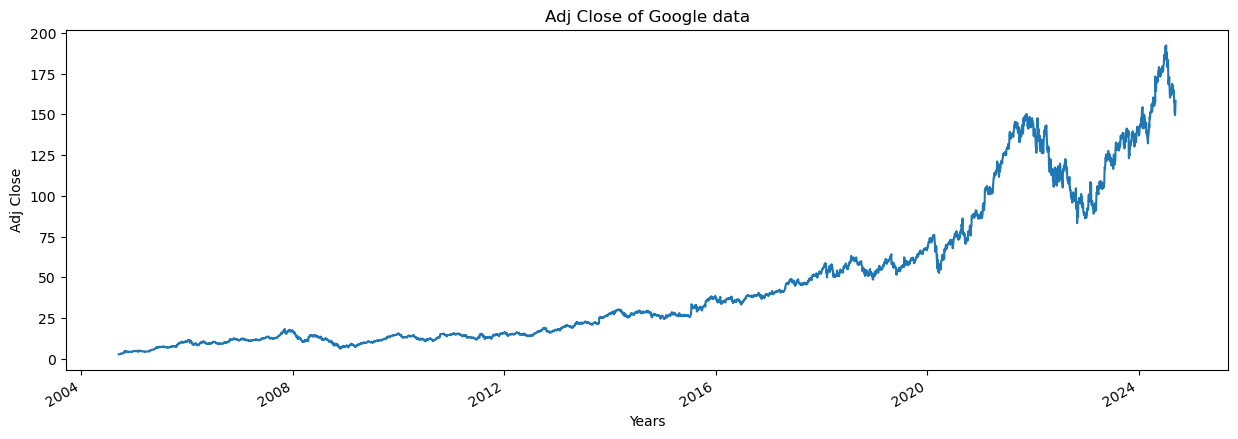

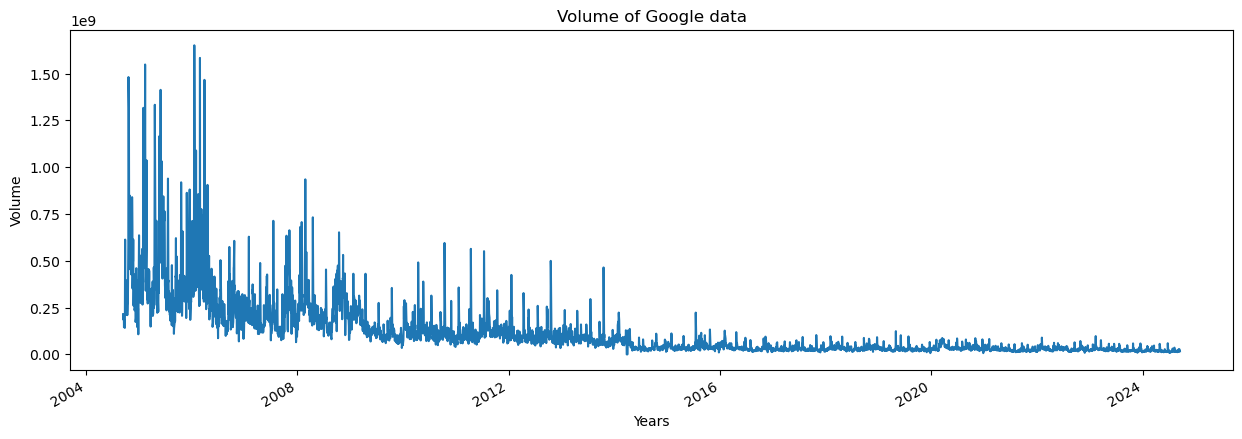

In [30]:
for i in google_data.columns:
    plot_graph((15,5),google_data[i],i)

In [32]:
import pandas as pd


In [35]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 76
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 177


### Moving average for 250 days

In [36]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [39]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-09-02         NaN
2005-09-06         NaN
2005-09-07         NaN
2005-09-08         NaN
2005-09-09    5.346321
Name: MA_for_250_days, dtype: float64

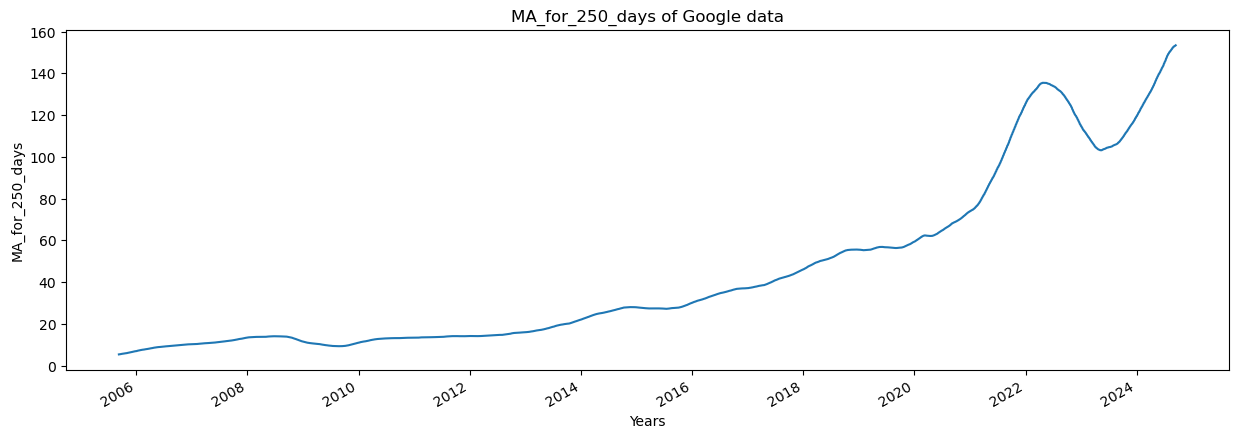

In [40]:
plot_graph((15,5),google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 1500x500 with 0 Axes>

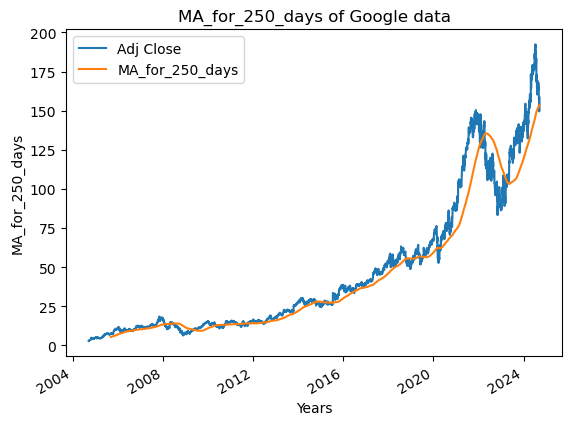

In [42]:
plot_graph((15,5),google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

### For 100 days

<Figure size 1500x500 with 0 Axes>

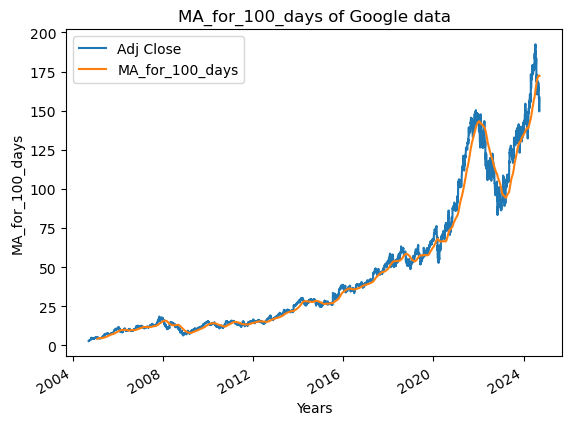

In [43]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5),google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 1500x500 with 0 Axes>

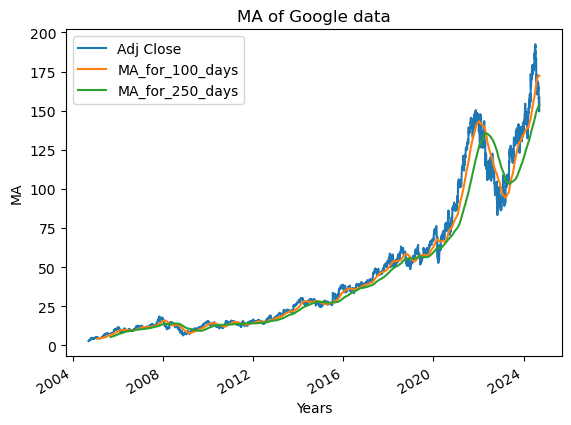

In [44]:
plot_graph((15,5),google_data[['Adj Close','MA_for_100_days','MA_for_250_days']], 'MA')

##### Plot for 100 days is much similar to the original plot, so for further analysis we are going to consider 100 days

In [46]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-09-15,2.782710,NaN
2004-09-16,2.831656,0.017589
2004-09-17,2.919113,0.030885
2004-09-20,2.965574,0.015916
2004-09-21,2.927809,-0.012735


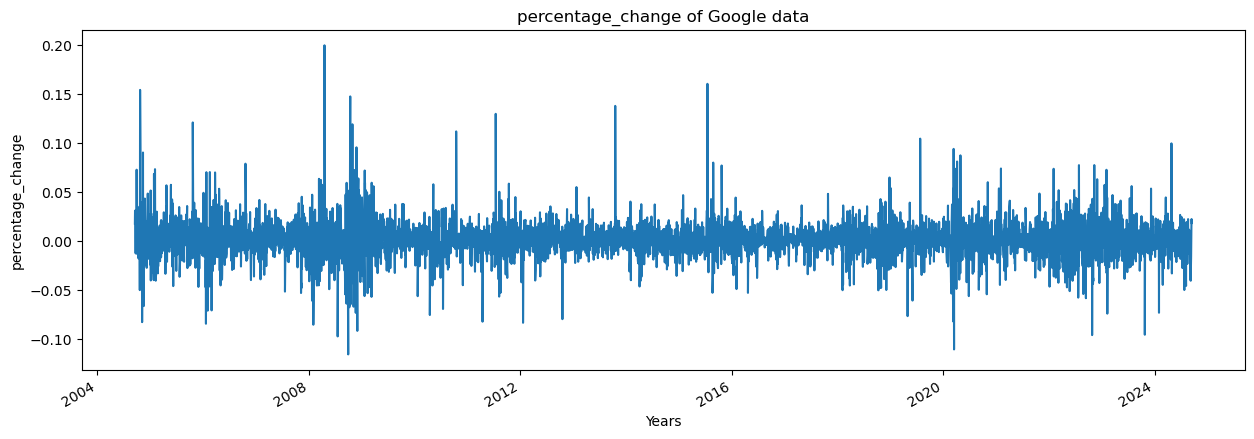

In [47]:
plot_graph((15,5),google_data['percentage_change_cp'],'percentage_change')

In [48]:
Adj_close_price = google_data[['Adj Close']]

#### Normalization of data 

In [56]:
max(Adj_close_price.values),min(Adj_close_price.values) 


(array([192.40672302]), array([2.78271008]))

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00000000e+00],
       [2.58120810e-04],
       [7.19333186e-04],
       ...,
       [7.87702367e-01],
       [8.05579846e-01],
       [8.20504126e-01]])

In [59]:
len(scaled_data)

5034

In [60]:
x_data = []
y_data = []
# here we are starting from 100 row. as we are calculating MA there will be null values in the first 100 rows.
for i in range(100,len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data,y_data = np.array(x_data), np.array(y_data)

In [61]:
x_data[2],y_data[2]

(array([[0.00071933],
        [0.00096435],
        [0.00076519],
        [0.00083594],
        [0.00115565],
        [0.00102593],
        [0.00082022],
        [0.00194704],
        [0.00249997],
        [0.00230605],
        [0.00269651],
        [0.00302145],
        [0.00345515],
        [0.00328613],
        [0.00351804],
        [0.00337129],
        [0.00304766],
        [0.00332806],
        [0.00378664],
        [0.00393077],
        [0.00420724],
        [0.00486892],
        [0.00470907],
        [0.00373292],
        [0.00489774],
        [0.00791789],
        [0.00987934],
        [0.0091456 ],
        [0.00969198],
        [0.0106524 ],
        [0.01030387],
        [0.01101009],
        [0.01085811],
        [0.01043882],
        [0.00952557],
        [0.00751433],
        [0.00793361],
        [0.00742916],
        [0.0073191 ],
        [0.00930545],
        [0.0091718 ],
        [0.00954784],
        [0.0079323 ],
        [0.00792706],
        [0.00727717],
        [0

### Train test split
Train = 70%
Test = 30%

In [64]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [71]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1481, 100, 1)
(1481, 1)


In [72]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [73]:
model = Sequential()

model.add(LSTM(128,return_sequences=True,input_shape =(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [74]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [75]:
model.fit(x_train,y_train,batch_size=1,epochs=2)

Epoch 1/2
3453/3453 [==============================] - 244s 68ms/step - loss: 1.2395e-04
Epoch 2/2
3453/3453 [==============================] - 214s 62ms/step - loss: 6.3738e-05


In [76]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [77]:
predictions = model.predict(x_test)

47/47 [==============================] - 6s 68ms/step


In [78]:
predictions

array([[0.2843681 ],
       [0.2785841 ],
       [0.27923623],
       ...,
       [0.8187811 ],
       [0.8205965 ],
       [0.83170813]], dtype=float32)

In [79]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 56.705727],
       [ 55.60894 ],
       [ 55.7326  ],
       ...,
       [158.04327 ],
       [158.38751 ],
       [160.49455 ]], dtype=float32)

In [80]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 52.40679932],
       [ 54.64430237],
       [ 53.44225693],
       ...,
       [152.1499939 ],
       [155.53999329],
       [158.36999512]])

In [82]:
rmse = np.sqrt(np.mean((inv_predictions-inv_y_test)**2))

In [83]:
rmse

5.31665366517617

In [85]:
plotting_data = pd.DataFrame(
    {
        'Original_test_data':inv_y_test.reshape(-1),
        'predictions':inv_predictions.reshape(-1)
    },
    index = google_data.index[splitting_len+100:]
)
plotting_data.head()

,Original_test_data,predictions
Date,,
2018-10-24,52.406799,56.705727
2018-10-25,54.644302,55.608940
2018-10-26,53.442257,55.732601
2018-10-29,50.879051,55.497086
2018-10-30,51.683575,54.178699


<Figure size 1500x600 with 0 Axes>

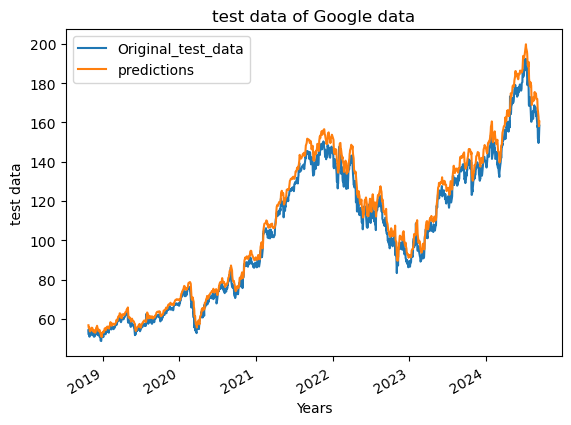

In [86]:
plot_graph((15,6),plotting_data,'test data')

<Figure size 1500x600 with 0 Axes>

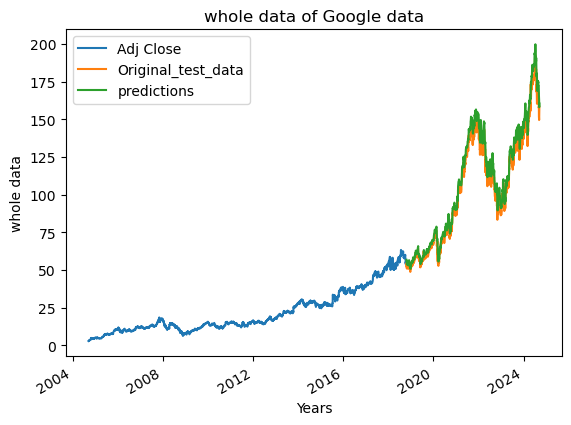

In [92]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],plotting_data], axis=0), 'whole data')


In [93]:
model.save("Latest_stock_price_model.keras")